# Import modules

In [253]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
import re
pwd = ! pwd
pwd = re.sub('notebooks/1-notebooks_prepare_HCC_data', '', pwd[0])
pwd

'/home/jovyan/work/'

# 1 - annotated metabolites + HMDB ID

## Agilent peak table

In [133]:
peakTable_Agilent = pd.read_csv(pwd + 'data/prepare_HCC_data/usable_peakTables/peakTable-Agilent-186_samples.csv',
                                sep=',', decimal='.', na_values=np.nan)
peakTable_Agilent

,country,Center,Idepic_Bio,Idepic_Samp,SampleID,SampleID_full,Id_Bma,Id Aliquot,CaseCtrl,ID_split_HCC,...,225.1218@0.86389714,398.7578@8.768545,288.1272@6.883725,126.0287@1.5353005,429.2873@6.211831,419.2505@8.916426,518.2205@6.2066946,400.2586@7.130359,103.0998@7.112515,267.142@6.969883
0,NaN,NaN,NaN,NaN,Blank_001,EPIC_Liver_Cancer_NR160614_001_Blank_001,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,Blank_101,EPIC_Liver_Cancer_NR160614_101_Blank_101,NaN,NaN,NaN,NaN,...,NaN,NaN,1429.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,Blank_201,EPIC_Liver_Cancer_NR160614_201_Blank_201,NaN,NaN,NaN,NaN,...,NaN,NaN,1685.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,41.0,41____41041872,41041872-s2#C1,LivCan_153,EPIC_Liver_Cancer_NR160614_007_41-LivCan_153_007,41-LivCan_153,41041872-s2#C,Incident,41041872.0,...,NaN,98959.0,20987.0,178906.0,NaN,184072.0,2547.0,6454.0,NaN,149023.0
4,4.0,41.0,41____41046868,41046868-s2#C1,LivCan_154,EPIC_Liver_Cancer_NR160614_008_41-LivCan_154_008,41-LivCan_154,41046868-s2#C,Non-case,41046868.0,...,2414.0,93145.0,28323.0,NaN,NaN,NaN,1043.0,6390.0,403011.0,164386.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,3.0,32.0,32____32253231,32253231-s3#C1,LivCan_080,EPIC_Liver_Cancer_NR160614_275_32-LivCan_080_275,275_32-LivCan_080_275,32253231-s3#C,Non-case,32253231.0,...,NaN,97137.0,24680.0,96880.0,1965.0,NaN,1781.0,40682.0,228548.0,111077.0
185,2.0,22.0,22____22281416,22281416-s1#B1,LivCan_375,EPIC_Liver_Cancer_NR160614_281_22-LivCan_375_281,281_22-LivCan_375_281,22281416-s1#B,Incident,22281416.0,...,4823.0,NaN,17378.0,93893.0,9988.0,87218.0,9131.0,NaN,221296.0,97565.0
186,2.0,22.0,22____22281701,22281701-s1#B1,LivCan_376,EPIC_Liver_Cancer_NR160614_282_22-LivCan_376_282,282_22-LivCan_376_282,22281701-s1#B,Non-case,22281701.0,...,4761.0,NaN,16624.0,108831.0,3127.0,NaN,2387.0,17483.0,369559.0,NaN
187,7.0,71.0,71____71000065,71000065-s2#C1,LivCan_165,EPIC_Liver_Cancer_NR160614_283_71-LivCan_165_283,283_71-LivCan_165_283,71000065-s2#C,Incident,71000065.0,...,38674.0,89525.0,11619.0,105422.0,3152.0,89313.0,2485.0,14052.0,212520.0,NaN


## Agilent compound annotations

In [497]:
Agilent_compounds_annotations = pd.read_csv(pwd + 'data/prepare_HCC_data/Agilent-compounds_annotations.csv',
                                sep=',', decimal='.', na_values=np.nan)
Agilent_compounds_annotations

,Compound,Annotations
0,89.9697@0.5505152,NaN
1,90.973@0.55399996,NaN
2,939.813@0.56963736,NaN
3,157.9574@0.5643974,NaN
4,871.8258@0.5736113,NaN
...,...,...
1210,419.2505@8.916426,NaN
1211,518.2205@6.2066946,NaN
1212,400.2586@7.130359,NaN
1213,103.0998@7.112515,NaN


In [513]:
list_formula = []
list_HMDB = []

for comp, annot in zip(Agilent_compounds_annotations['Compound'].values, Agilent_compounds_annotations['Annotations'].values):
    
    if annot == annot:
        
        formula = re.sub(' ', '', annot.split('[')[-1].split(',')[0])
        #print(f'formula : {formula}')
        
        HMDB = [x.group() for x in re.finditer(r'HMDB(.*?)[ |\)]', annot)]
        HMDB = [re.sub(r'([ )])', r'', m) for m in HMDB]
        HMDB = '/'.join(HMDB)
        #print(f'HMDB : {HMDB}')

        list_formula.append(formula)
        list_HMDB.append(HMDB)
        
    else:
        list_compound.append(np.nan)
        list_formula.append(np.nan)
        list_HMDB.append(np.nan)
        
        
infos_compounds = pd.DataFrame(zip(list_formula, list_HMDB),
                                    columns =['Formula', 'HMDB'])
infos_compounds = pd.concat([Agilent_compounds_annotations, infos_compounds], axis=1)
Agilent_infos_compounds = infos_compounds.copy()
Agilent_infos_compounds = Agilent_infos_compounds.drop(['Annotations', 'Formula'], axis=1)

print(Agilent_infos_compounds.notna().sum())
Agilent_infos_compounds

Compound    1215
HMDB          81
dtype: int64


,Compound,HMDB
0,89.9697@0.5505152,NaN
1,90.973@0.55399996,NaN
2,939.813@0.56963736,NaN
3,157.9574@0.5643974,NaN
4,871.8258@0.5736113,NaN
...,...,...
1210,419.2505@8.916426,NaN
1211,518.2205@6.2066946,NaN
1212,400.2586@7.130359,NaN
1213,103.0998@7.112515,NaN


In [514]:
Agilent_infos_compounds.to_csv(pwd + 'data/prepare_HCC_data/for_Adam/Agilent-annotated_metabolites_and_HMDB_IDs.csv',
                               index=False, header=True)

infos_compounds.to_csv(pwd + 'data/prepare_HCC_data/for_Adam/infos_compounds.csv',
                                     index=False, header=True)

## Metaboigniter peak table

In [174]:
peakTable_HILIC_POS_full = pd.read_csv(pwd + 'data/prepare_HCC_data/peakTable_HILIC_POS_full.csv', sep=',', decimal='.', na_values='NA')
print(peakTable_HILIC_POS_full.shape)
peakTable_HILIC_POS_full.head()

(186, 565)


,SampleID,Groups,MatchCaseset,TypTumo,CaseHCCWide,EPICID,EPICBioID,AliquotID,variable_3,variable_5,...,variable_2339,variable_2340,variable_2350,variable_2353,variable_2364,variable_2365,variable_2368,variable_2370,variable_2375,variable_2379
0,LivCan_153,Incident,82,HCC,Yes,41____41041872,41____41041872,41041872-s2#C,19.761786,14.635833,...,12.052252,12.568647,13.192848,13.230752,12.248590,12.114328,14.269258,12.355017,13.114289,13.882526
1,LivCan_154,Non-case,82,NaN,No,41____41046868,41____41046868,41046868-s2#C,19.735279,15.193396,...,13.020365,12.928643,13.697314,NaN,12.604052,NaN,NaN,12.208084,NaN,NaN
2,LivCan_267,Incident,427,HCC,Yes,41____41074588,41____41074588,41074588-s1#B,19.116076,15.446714,...,NaN,NaN,NaN,13.330175,NaN,NaN,14.215988,NaN,12.955618,13.778398
3,LivCan_268,Non-case,427,NaN,No,41____41089214,41____41089214,41089214-s1#B,19.376875,15.460525,...,NaN,NaN,13.086805,13.304171,NaN,11.605353,14.284148,12.319119,13.058285,13.812829
4,LivCan_299,Incident,376,HCC_Wide,Yes,21____21103888,21____21103888,21103888-s1#B,19.555938,14.515536,...,NaN,NaN,NaN,13.306722,12.349830,11.926237,14.192775,NaN,13.006556,13.841201


In [175]:
variable_identification = pd.read_csv(pwd +
                                      'data/HILIC_POS_results/process_output_quantid_pos_camera_metfrag/varsPOSout_pos_metfrag.txt',
                                      sep='\t', decimal='.', na_values='NA')
print(variable_identification.shape)
variable_identification.head()

(557, 34)


,variableMetadata,parentMZ,parentRT,Score,MonoisotopicMass,SMILES,InChIKey,Name,NoExplPeaks,NumberPeaksUsed,...,xcmsCamera_mzmin,xcmsCamera_mzmax,xcmsCamera_rt,xcmsCamera_rtmin,xcmsCamera_rtmax,xcmsCamera_npeaks,xcmsCamera_isotopes,xcmsCamera_adduct,xcmsCamera_pcgroup,imputed
0,variable_3,61.0398,93.949,2.0,60.032363,NC(N)=O,XSQUKJJJFZCRTK-UHFFFAOYSA-N,Urea,31,52,...,61.039608,61.039794,93.384,92.664,94.640,211,NaN,NaN,36,No
1,variable_5,62.0601,276.539,2.0,61.052764,NCCO,HZAXFHJVJLSVMW-UHFFFAOYSA-N,Ethanolamine,40,175,...,62.059914,62.060261,275.004,273.825,275.644,210,NaN,NaN,56,No
2,variable_6,140.0682,304.407,2.0,117.078979,NCCCCC(O)=O,JJMDCOVWQOJGCB-UHFFFAOYSA-N,delta-Aminovaleric acid,115,287,...,64.015582,64.016015,299.386,195.740,317.234,272,[1][M]+,NaN,22,yes
3,variable_7,140.0682,304.407,2.0,117.078979,NCCCCC(O)=O,JJMDCOVWQOJGCB-UHFFFAOYSA-N,delta-Aminovaleric acid,115,287,...,65.018672,65.019122,299.389,276.857,300.455,213,[1][M+1]+,NaN,22,yes
4,variable_8,61.0398,93.949,2.0,60.032363,NC(N)=O,XSQUKJJJFZCRTK-UHFFFAOYSA-N,Urea,31,52,...,65.018564,65.019229,93.384,39.738,94.640,154,NaN,NaN,36,yes


In [176]:
metaboigniter_infos_compounds = variable_identification[['variableMetadata', 'Identifier']]
metaboigniter_infos_compounds

,variableMetadata,Identifier
0,variable_3,HMDB0000294
1,variable_5,HMDB0000149
2,variable_6,HMDB0003355
3,variable_7,HMDB0003355
4,variable_8,HMDB0000294
...,...,...
552,variable_2365,HMDB0002259
553,variable_2368,HMDB0003355
554,variable_2370,HMDB0002259
555,variable_2375,HMDB0003355


In [181]:
len(np.unique(metaboigniter_infos_compounds['Identifier']))

54

In [184]:
metaboigniter_infos_compounds.to_csv(pwd + 'data/prepare_HCC_data/for_Adam/metaboigniter-annotated_metabolites_and_HMDB_IDs.csv',
                                     index=False, header=True)

# 2- annotated metabolites + m/z

## Agilent

### In the following dataframe, we have 1215 rows, corresponding to features in Agilent peak tables

In [515]:
Agilent_infos_compounds

,Compound,HMDB
0,89.9697@0.5505152,NaN
1,90.973@0.55399996,NaN
2,939.813@0.56963736,NaN
3,157.9574@0.5643974,NaN
4,871.8258@0.5736113,NaN
...,...,...
1210,419.2505@8.916426,NaN
1211,518.2205@6.2066946,NaN
1212,400.2586@7.130359,NaN
1213,103.0998@7.112515,NaN


### 1134 of them are not identified, compound with form *mz@rt*

In [516]:
Agilent_infos_compounds_mzrt = Agilent_infos_compounds[Agilent_infos_compounds['Compound'].str.contains('@')]
Agilent_infos_compounds_mzrt

,Compound,HMDB
0,89.9697@0.5505152,NaN
1,90.973@0.55399996,NaN
2,939.813@0.56963736,NaN
3,157.9574@0.5643974,NaN
4,871.8258@0.5736113,NaN
...,...,...
1210,419.2505@8.916426,NaN
1211,518.2205@6.2066946,NaN
1212,400.2586@7.130359,NaN
1213,103.0998@7.112515,NaN


### 81 of them are identified, compound with form *name of compound*

In [517]:
Agilent_infos_compounds_id = Agilent_infos_compounds[~Agilent_infos_compounds['Compound'].str.contains('@')]
Agilent_infos_compounds_id

,Compound,HMDB
63,N-Methylnicotinamide,HMDB03152
64,Epinephrine,HMDB00068
70,creatinine,HMDB00562
75,guanidoacetate,HMDB00128
76,L-Alanine,HMDB00161
...,...,...
1154,Dimethylsulfone,HMDB04983
1160,Sphingosine,HMDB00252
1163,Proline betaine +2.3243585,HMDB04827
1167,homocysteine,HMDB00742


### We want, for each of these two dataframes, information on mz and rt for each feature/compound

In [518]:
Agilent_infos_compounds_mzrt_mass = Agilent_infos_compounds_mzrt.copy()
Agilent_infos_compounds_mzrt_mass['Mass'] = Agilent_infos_compounds_mzrt_mass['Compound'].str.split('@').str[0]
Agilent_infos_compounds_mzrt_mass['Retention Time'] = Agilent_infos_compounds_mzrt_mass['Compound'].str.split('@').str[1]
Agilent_infos_compounds_mzrt_mass

,Compound,HMDB,Mass,Retention Time
0,89.9697@0.5505152,NaN,89.9697,0.5505152
1,90.973@0.55399996,NaN,90.973,0.55399996
2,939.813@0.56963736,NaN,939.813,0.56963736
3,157.9574@0.5643974,NaN,157.9574,0.5643974
4,871.8258@0.5736113,NaN,871.8258,0.5736113
...,...,...,...,...
1210,419.2505@8.916426,NaN,419.2505,8.916426
1211,518.2205@6.2066946,NaN,518.2205,6.2066946
1212,400.2586@7.130359,NaN,400.2586,7.130359
1213,103.0998@7.112515,NaN,103.0998,7.112515


In [519]:
compounds_IDs = pd.read_excel(pwd + 'data/prepare_HCC_data/Microbial metabolites.xlsx', sheet_name='Sheet1')
print(compounds_IDs.shape)
compounds_IDs

(415, 6)


,Name,Formula,Mass,Retention Time,PubChem,HMP
0,Saponin D,C48H78O17,926.523901,NaN,NaN,HMDB40468
1,Benzoyl-CoA,C28H40N7O17P3S,871.141423,NaN,NaN,HMDB02252
2,Coenzyme Q10,C59H90O4,862.683911,NaN,NaN,HMDB01072
3,Coenzyme Q9,C54H82O4,794.621311,NaN,NaN,HMDB06707
4,lecithin,C40H80NO8P,733.562155,NaN,NaN,HMDB00564
...,...,...,...,...,...,...
410,3-hydroxybutyric acid (HMDB0000357),C4H8O3,104.047340,1.49,NaN,NaN
411,2-Hydroxyhippuric acid (HMDB0000840),C9H9NO4,195.053160,3.55,NaN,NaN
412,3-phenylpropionate (HMDB0000764),C9H10O2,150.068080,4.77,NaN,NaN
413,Lithocholic acid (HMDB0000761),C24H40O3,376.297750,7.01,NaN,NaN


In [520]:
list_HMDB = []

for i, name in enumerate(compounds_IDs['Name']):
    
    if 'HMDB' not in name:
        curr_HMDB = compounds_IDs.loc[i, 'HMP']
        list_HMDB.append(curr_HMDB)
        
    else:
        HMDB = [x.group() for x in re.finditer(r'HMDB(.*?)\)', name)]
        HMDB = [re.sub(r'([ )])', r'', m) for m in HMDB]
        curr_HMDB = '/'.join(HMDB)
        list_HMDB.append(curr_HMDB)
    
print(len(list_HMDB))

415


In [521]:
compounds_IDs['more_HMDB'] = list_HMDB
compounds_IDs

,Name,Formula,Mass,Retention Time,PubChem,HMP,more_HMDB
0,Saponin D,C48H78O17,926.523901,NaN,NaN,HMDB40468,HMDB40468
1,Benzoyl-CoA,C28H40N7O17P3S,871.141423,NaN,NaN,HMDB02252,HMDB02252
2,Coenzyme Q10,C59H90O4,862.683911,NaN,NaN,HMDB01072,HMDB01072
3,Coenzyme Q9,C54H82O4,794.621311,NaN,NaN,HMDB06707,HMDB06707
4,lecithin,C40H80NO8P,733.562155,NaN,NaN,HMDB00564,HMDB00564
...,...,...,...,...,...,...,...
410,3-hydroxybutyric acid (HMDB0000357),C4H8O3,104.047340,1.49,NaN,NaN,HMDB0000357
411,2-Hydroxyhippuric acid (HMDB0000840),C9H9NO4,195.053160,3.55,NaN,NaN,HMDB0000840
412,3-phenylpropionate (HMDB0000764),C9H10O2,150.068080,4.77,NaN,NaN,HMDB0000764
413,Lithocholic acid (HMDB0000761),C24H40O3,376.297750,7.01,NaN,NaN,HMDB0000761


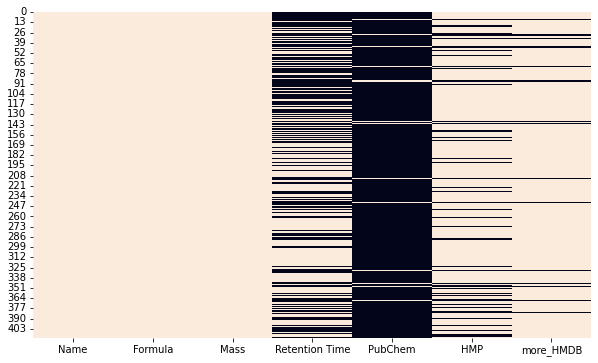

In [522]:
plt.figure(figsize=(10, 6))
sns.heatmap(compounds_IDs.notna(), cbar=False);

In [523]:
compounds_IDs[compounds_IDs['more_HMDB'].isna()].head()

,Name,Formula,Mass,Retention Time,PubChem,HMP,more_HMDB
5,Sphingomyelin (d18:2/18:0),C41H81N2O6P,728.583225,NaN,52931161.0,NaN,NaN
9,Stercobilin,C33H46N4O6,594.341735,NaN,129627862.0,NaN,NaN
28,(-)-epicatechin glucuronide,C21H22O12,466.111126,NaN,101449863.0,NaN,NaN
30,Glyco-beta-muricholic acid,C26H43NO6,465.309038,NaN,NaN,NaN,NaN
34,Glycochenodeoxycholic acid (2),C26H43NO5,449.314120,6.421,NaN,NaN,NaN


In [525]:
compounds_IDs

,Name,Formula,Mass,Retention Time,PubChem,HMP,more_HMDB
0,Saponin D,C48H78O17,926.523901,NaN,NaN,HMDB40468,HMDB40468
1,Benzoyl-CoA,C28H40N7O17P3S,871.141423,NaN,NaN,HMDB02252,HMDB02252
2,Coenzyme Q10,C59H90O4,862.683911,NaN,NaN,HMDB01072,HMDB01072
3,Coenzyme Q9,C54H82O4,794.621311,NaN,NaN,HMDB06707,HMDB06707
4,lecithin,C40H80NO8P,733.562155,NaN,NaN,HMDB00564,HMDB00564
...,...,...,...,...,...,...,...
410,3-hydroxybutyric acid (HMDB0000357),C4H8O3,104.047340,1.49,NaN,NaN,HMDB0000357
411,2-Hydroxyhippuric acid (HMDB0000840),C9H9NO4,195.053160,3.55,NaN,NaN,HMDB0000840
412,3-phenylpropionate (HMDB0000764),C9H10O2,150.068080,4.77,NaN,NaN,HMDB0000764
413,Lithocholic acid (HMDB0000761),C24H40O3,376.297750,7.01,NaN,NaN,HMDB0000761


In [526]:
merge = pd.merge(Agilent_infos_compounds_id, compounds_IDs,
         left_on='HMDB', right_on='more_HMDB', how='left')
merge

,Compound,HMDB,Name,Formula,Mass,Retention Time,PubChem,HMP,more_HMDB
0,N-Methylnicotinamide,HMDB03152,N-Methylnicotinamide,C7H8N2O,136.063663,NaN,NaN,HMDB03152,HMDB03152
1,Epinephrine,HMDB00068,Epinephrine,C9H13NO3,183.089543,0.688,NaN,HMDB00068,HMDB00068
2,creatinine,HMDB00562,creatinine,C4H7N3O,113.058912,0.598,NaN,HMDB00562,HMDB00562
3,guanidoacetate,HMDB00128,guanidoacetate,C3H7N3O2,117.053826,0.618,NaN,HMDB00128,HMDB00128
4,L-Alanine,HMDB00161,L-Alanine,C3H7NO2,89.047678,0.621,NaN,HMDB00161,HMDB00161
...,...,...,...,...,...,...,...,...,...
76,Dimethylsulfone,HMDB04983,Dimethylsulfone,C2H6O2S,94.008850,0.840,NaN,HMDB04983,HMDB04983
77,Sphingosine,HMDB00252,Sphingosine,C18H37NO2,299.282429,6.065,NaN,HMDB00252,HMDB00252
78,Proline betaine +2.3243585,HMDB04827,Proline betaine,C7H13NO2,143.094629,NaN,NaN,HMDB04827,HMDB04827
79,homocysteine,HMDB00742,homocysteine,C4H9NO2S,135.035399,0.737,NaN,HMDB00742,HMDB00742


In [527]:
Agilent_infos_compounds_id[Agilent_infos_compounds_id['Compound'] == '5-Aminovaleric acid betaine']['HMDB'].values

array([''], dtype=object)

In [528]:
merge[merge['more_HMDB'].isna()]

,Compound,HMDB,Name,Formula,Mass,Retention Time,PubChem,HMP,more_HMDB
14,5-Aminovaleric acid betaine,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,5-Aminovaleric acid betaine +3.538995,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,Glyco-beta-muricholic acid,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,N-Methylproline,,NaN,NaN,NaN,NaN,NaN,NaN,NaN


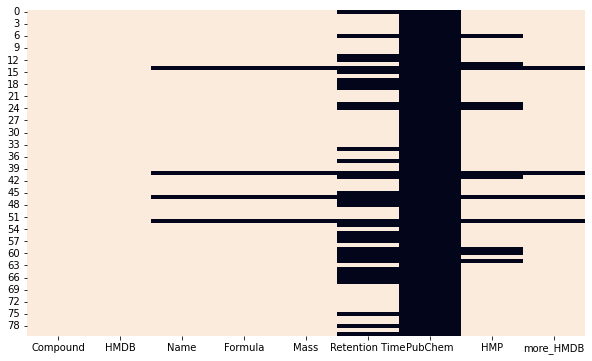

In [529]:
plt.figure(figsize=(10, 6))
sns.heatmap(merge.notna(), cbar=False);

In [478]:
Agilent_infos_compounds_mzrt_mass

,Compound,HMDB,Mass,Retention Time
0,89.9697@0.5505152,NaN,89.9697,0.5505152
1,90.973@0.55399996,NaN,90.973,0.55399996
2,939.813@0.56963736,NaN,939.813,0.56963736
3,157.9574@0.5643974,NaN,157.9574,0.5643974
4,871.8258@0.5736113,NaN,871.8258,0.5736113
...,...,...,...,...
1210,419.2505@8.916426,NaN,419.2505,8.916426
1211,518.2205@6.2066946,NaN,518.2205,6.2066946
1212,400.2586@7.130359,NaN,400.2586,7.130359
1213,103.0998@7.112515,NaN,103.0998,7.112515


In [530]:
merge

,Compound,HMDB,Name,Formula,Mass,Retention Time,PubChem,HMP,more_HMDB
0,N-Methylnicotinamide,HMDB03152,N-Methylnicotinamide,C7H8N2O,136.063663,NaN,NaN,HMDB03152,HMDB03152
1,Epinephrine,HMDB00068,Epinephrine,C9H13NO3,183.089543,0.688,NaN,HMDB00068,HMDB00068
2,creatinine,HMDB00562,creatinine,C4H7N3O,113.058912,0.598,NaN,HMDB00562,HMDB00562
3,guanidoacetate,HMDB00128,guanidoacetate,C3H7N3O2,117.053826,0.618,NaN,HMDB00128,HMDB00128
4,L-Alanine,HMDB00161,L-Alanine,C3H7NO2,89.047678,0.621,NaN,HMDB00161,HMDB00161
...,...,...,...,...,...,...,...,...,...
76,Dimethylsulfone,HMDB04983,Dimethylsulfone,C2H6O2S,94.008850,0.840,NaN,HMDB04983,HMDB04983
77,Sphingosine,HMDB00252,Sphingosine,C18H37NO2,299.282429,6.065,NaN,HMDB00252,HMDB00252
78,Proline betaine +2.3243585,HMDB04827,Proline betaine,C7H13NO2,143.094629,NaN,NaN,HMDB04827,HMDB04827
79,homocysteine,HMDB00742,homocysteine,C4H9NO2S,135.035399,0.737,NaN,HMDB00742,HMDB00742


In [532]:
Agilent_infos_compounds_id_mass = merge[['Compound', 'HMDB', 'Mass', 'Retention Time']]
Agilent_infos_compounds_id_mass

,Compound,HMDB,Mass,Retention Time
0,N-Methylnicotinamide,HMDB03152,136.063663,NaN
1,Epinephrine,HMDB00068,183.089543,0.688
2,creatinine,HMDB00562,113.058912,0.598
3,guanidoacetate,HMDB00128,117.053826,0.618
4,L-Alanine,HMDB00161,89.047678,0.621
...,...,...,...,...
76,Dimethylsulfone,HMDB04983,94.008850,0.840
77,Sphingosine,HMDB00252,299.282429,6.065
78,Proline betaine +2.3243585,HMDB04827,143.094629,NaN
79,homocysteine,HMDB00742,135.035399,0.737


In [549]:
whole_merge = pd.concat([Agilent_infos_compounds_mzrt_mass, Agilent_infos_compounds_id_mass], axis=0, ignore_index=True)
whole_merge = whole_merge.set_index('Compound')
whole_merge = whole_merge.reindex(index=Agilent_infos_compounds['Compound'])
whole_merge = whole_merge.reset_index()
whole_merge = whole_merge.drop('HMDB', axis=1)
whole_merge

,Compound,Mass,Retention Time
0,89.9697@0.5505152,89.9697,0.5505152
1,90.973@0.55399996,90.973,0.55399996
2,939.813@0.56963736,939.813,0.56963736
3,157.9574@0.5643974,157.9574,0.5643974
4,871.8258@0.5736113,871.8258,0.5736113
...,...,...,...
1210,419.2505@8.916426,419.2505,8.916426
1211,518.2205@6.2066946,518.2205,6.2066946
1212,400.2586@7.130359,400.2586,7.130359
1213,103.0998@7.112515,103.0998,7.112515


In [550]:
whole_merge.to_csv(pwd + 'data/prepare_HCC_data/for_Adam/Agilent-annotated_metabolites_and_mz_rt.csv',
                   index=False, header=True)

## metaboigniter

In [551]:
variable_identification.head()

,variableMetadata,parentMZ,parentRT,Score,MonoisotopicMass,SMILES,InChIKey,Name,NoExplPeaks,NumberPeaksUsed,...,xcmsCamera_mzmin,xcmsCamera_mzmax,xcmsCamera_rt,xcmsCamera_rtmin,xcmsCamera_rtmax,xcmsCamera_npeaks,xcmsCamera_isotopes,xcmsCamera_adduct,xcmsCamera_pcgroup,imputed
0,variable_3,61.0398,93.949,2.0,60.032363,NC(N)=O,XSQUKJJJFZCRTK-UHFFFAOYSA-N,Urea,31,52,...,61.039608,61.039794,93.384,92.664,94.640,211,NaN,NaN,36,No
1,variable_5,62.0601,276.539,2.0,61.052764,NCCO,HZAXFHJVJLSVMW-UHFFFAOYSA-N,Ethanolamine,40,175,...,62.059914,62.060261,275.004,273.825,275.644,210,NaN,NaN,56,No
2,variable_6,140.0682,304.407,2.0,117.078979,NCCCCC(O)=O,JJMDCOVWQOJGCB-UHFFFAOYSA-N,delta-Aminovaleric acid,115,287,...,64.015582,64.016015,299.386,195.740,317.234,272,[1][M]+,NaN,22,yes
3,variable_7,140.0682,304.407,2.0,117.078979,NCCCCC(O)=O,JJMDCOVWQOJGCB-UHFFFAOYSA-N,delta-Aminovaleric acid,115,287,...,65.018672,65.019122,299.389,276.857,300.455,213,[1][M+1]+,NaN,22,yes
4,variable_8,61.0398,93.949,2.0,60.032363,NC(N)=O,XSQUKJJJFZCRTK-UHFFFAOYSA-N,Urea,31,52,...,65.018564,65.019229,93.384,39.738,94.640,154,NaN,NaN,36,yes


In [554]:
metaboigniter_infos_mz_rt = variable_identification[['variableMetadata', 'parentMZ', 'parentRT']]
metaboigniter_infos_mz_rt

,variableMetadata,parentMZ,parentRT
0,variable_3,61.0398,93.949
1,variable_5,62.0601,276.539
2,variable_6,140.0682,304.407
3,variable_7,140.0682,304.407
4,variable_8,61.0398,93.949
...,...,...,...
552,variable_2365,288.2907,58.514
553,variable_2368,140.0682,304.407
554,variable_2370,288.2907,58.514
555,variable_2375,140.0682,304.407


In [555]:
metaboigniter_infos_mz_rt.to_csv(pwd + 'data/prepare_HCC_data/for_Adam/metaboigniter-annotated_metabolites_and_mz_rt.csv',
                                 index=False, header=True)